In [ ]:
"""
Day 1: understanding dataset & problem. researching solutions & methods
Day 2: design a pipeline with a basic CNN model and implement code 
Day 3: using different models like CC Trans, MCNN
Day 4: implementing (MCNN + CBAM) , (MCNN + CBAM + dialated conv)
day 5: CSRnet and its variants
day 6: transpose convolutions
day 7: documnetation 
"""

In [ ]:
import scipy.io
temp = []

def loop(c):
    mat = scipy.io.loadmat(f'crowd_wala_dataset/train_data/ground_truth/GT_IMG_{c}.mat')
    # print(mat.keys())

    image_info = mat['image_info']
    points = image_info[0, 0][0, 0][0]
    # print(points.shape)
    temp.append((points.shape[0],int(c)))
    # print(points[:5]) 

for i in range(1,400):
    loop(str(i))
print(sorted(temp))

def classify_crowd(count):
    if count < 50:
        return 'sparse'
    elif 50 <= count <= 300:
        return 'moderate'
    else:
        return 'dense'

sorted_temp = sorted(temp)
classified_data = [(count, img_id, classify_crowd(count)) for count, img_id in sorted_temp]
for count, img_id, label in classified_data:
    print(f"image: {img_id}, count: {count}, crowd type: {label}")

[(12, 158), (13, 255), (14, 88), (15, 171), (15, 332), (16, 288), (19, 355), (20, 93), (20, 238), (21, 35), (22, 86), (23, 52), (23, 233), (23, 293), (23, 335), (23, 373), (25, 59), (25, 244), (26, 144), (26, 276), (26, 277), (26, 314), (27, 102), (27, 153), (27, 165), (27, 285), (27, 328), (28, 61), (28, 120), (28, 125), (28, 235), (28, 350), (28, 396), (29, 3), (29, 94), (29, 195), (29, 264), (30, 45), (30, 82), (30, 201), (30, 278), (31, 104), (31, 110), (31, 143), (32, 36), (32, 76), (32, 265), (33, 196), (33, 232), (33, 333), (33, 347), (34, 84), (34, 211), (34, 268), (34, 292), (35, 71), (35, 316), (35, 326), (35, 339), (36, 6), (36, 92), (36, 213), (36, 261), (37, 91), (37, 236), (38, 87), (38, 220), (39, 57), (40, 60), (41, 73), (41, 128), (41, 152), (41, 313), (42, 16), (42, 121), (42, 135), (42, 173), (43, 19), (43, 42), (43, 78), (43, 122), (45, 179), (45, 366), (46, 253), (46, 390), (47, 74), (47, 85), (47, 206), (47, 262), (47, 294), (47, 298), (49, 17), (49, 161), (49, 24

In [ ]:
import scipy.io
temp = []

def loop(c):
    mat = scipy.io.loadmat(f'crowd_wala_dataset/test_data/ground_truth/GT_IMG_{c}.mat')
    # print(mat.keys())

    image_info = mat['image_info']
    points = image_info[0, 0][0, 0][0]
    # print(points.shape)
    temp.append((points.shape[0],int(c)))
    # print(points[:5]) 

for i in range(1,317):
    loop(str(i))
print(sorted(temp))

def classify_crowd(count):
    if count < 50:
        return 'sparse'
    elif 50 <= count <= 300:
        return 'moderate'
    else:
        return 'dense'

# Apply to your data
sorted_temp = sorted(temp)
classified_data = [(count, img_id, classify_crowd(count)) for count, img_id in sorted_temp]

# Print results
for count, img_id, label in classified_data:
    print(f"image: {img_id}, count: {count}, crowd type: {label}")

[(9, 198), (11, 172), (15, 20), (15, 171), (20, 111), (20, 288), (21, 177), (23, 1), (23, 89), (24, 142), (24, 250), (24, 282), (26, 52), (28, 44), (28, 265), (28, 296), (29, 14), (29, 233), (29, 313), (31, 252), (32, 41), (32, 128), (33, 301), (35, 49), (35, 60), (35, 141), (35, 210), (36, 9), (36, 264), (37, 101), (38, 26), (38, 276), (38, 284), (40, 117), (40, 189), (41, 34), (41, 42), (42, 37), (43, 156), (43, 178), (44, 32), (44, 82), (44, 104), (45, 175), (45, 289), (46, 157), (46, 294), (47, 7), (47, 151), (47, 308), (48, 39), (48, 53), (48, 59), (48, 70), (48, 95), (48, 113), (48, 161), (48, 200), (49, 13), (49, 255), (51, 30), (51, 64), (51, 122), (51, 211), (51, 238), (51, 314), (52, 2), (52, 215), (53, 94), (54, 72), (54, 87), (54, 162), (54, 260), (54, 271), (54, 285), (54, 312), (54, 315), (55, 86), (55, 123), (55, 258), (56, 84), (56, 188), (57, 15), (57, 83), (57, 103), (57, 168), (57, 205), (57, 278), (58, 126), (58, 192), (59, 68), (59, 144), (59, 266), (60, 54), (60, 

In [16]:
mat = scipy.io.loadmat('crowd_wala_dataset/train_data/ground_truth/GT_IMG_2.mat')
image_info = mat['image_info']
points = image_info[0, 0][0, 0][0]
print(points.shape)

(153, 2)


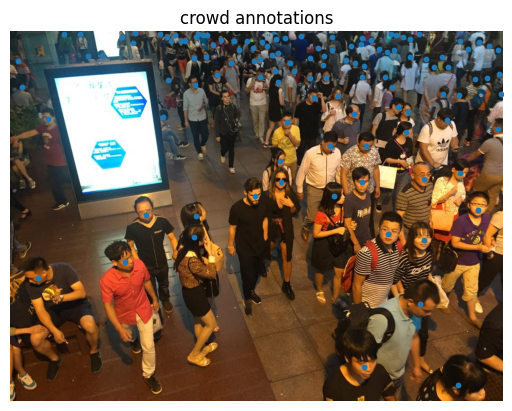

In [5]:
import scipy.io
import matplotlib.pyplot as plt
import cv2

# Load the image
image_path = 'crowd_wala_dataset/train_data/images/IMG_132.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

mat = scipy.io.loadmat('crowd_wala_dataset/train_data/ground_truth/GT_IMG_132.mat')
image_info = mat['image_info']
points = image_info[0, 0][0, 0][0] 

# Plot image
plt.imshow(img_rgb)
plt.scatter(points[:, 0], points[:, 1], s= 10)
plt.axis('off')
plt.title('crowd annotations')
plt.show()

In [6]:
import cv2
img = cv2.imread('crowd_wala_dataset/train_data/images/IMG_3.jpg')
height, width, channels = img.shape
print(f"W: {width}, H: {height}, C: {channels}")

W: 1024, H: 768, C: 3


In [7]:
import numpy as np
import scipy.io
import os
from skimage.metrics import structural_similarity as ssim

image_dir = 'crowd_wala_dataset/train_data/images/'
gt_dir = 'crowd_wala_dataset/train_data/ground_truth/'

for i in range(9,10):
    num_sum = 0
    errors1 = []
    errors2 = []
    npy_dir = f'density_maps/train_data_sigma_{i}_new2/'

    for image_file in os.listdir(image_dir):
        mat_path = os.path.join(gt_dir, "GT_" + image_file.replace(".jpg", ".mat"))
        density_map_path = os.path.join(npy_dir, image_file.replace(".jpg", ".npy"))

        # load gt
        mat = scipy.io.loadmat(mat_path)
        points = mat["image_info"][0, 0][0, 0][0]
        actual_count = len(points)

        # load generated density map
        density_map = np.load(density_map_path)
        predicted_count = np.sum(density_map)
        diff = abs(actual_count-predicted_count)
        errors1.append(diff)
        errors2.append(diff*diff)
    
        # print(f"{image_file}: err = {diff}")

    errors1 = np.array(errors1)
    errors2 = np.array(errors2)
    mae = np.mean(errors1)
    mse = np.mean(errors2)
    variance = np.var(errors1)
    print(f"sigma {i}:")
    print(f"mse: {mae}")
    print(f"mse: {mse}")
    print(f"variance: {variance}")

sigma 9:
mse: 4.159608840942383
mse: 22.065937042236328
variance: 4.763588905334473


In [8]:
import cv2

video_path = "crowd_test_data/1.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("err opening")
else:
    fps = cap.get(cv2.CAP_PROP_FPS)
    print("FPS =", fps)

cap.release()
print(24*30)

FPS = 24.0
720
